### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

%matplotlib inline

### loading the data

In [2]:
df = pd.read_excel(r"F:\Data Analysis Project Challenge\Zoom Charts Challenge\FP20 Analytics Challenges\Dataset_FP20Analytics_Feb_2025\Dataset\Transportation & Logistics Tracking Dataset.xlsx", sheet_name = "Primary Data")

### Shape of data

In [3]:
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")

Rows : 3585, Columns : 28


### Information like null values, datatype about the each column in dataframe 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Gps Provider                        3585 non-null   object        
 1   Booking ID                          3585 non-null   object        
 2   Shipment Type                       3585 non-null   object        
 3   Booking Date                        3585 non-null   datetime64[ns]
 4   Vehicle Registration                3585 non-null   object        
 5   Origin Location                     3585 non-null   object        
 6   Destination Location                3585 non-null   object        
 7   Origin Location Latitude            3585 non-null   float64       
 8   Origin Location Longitude           3585 non-null   float64       
 9   Destination Location Latitude       3585 non-null   float64       
 10  Destination Location Lon

### How many null values in each column

In [5]:
df.isnull().sum()

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                         0
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)           148
Vehicle Type                           764
Minimum Kms To Be Covered In A Day    2645
Driver Name

### How many duplicate rows

In [6]:
df.duplicated().sum()

np.int64(0)

No duplicated row

### display setting to see all the rows and columns

In [7]:
pd.set_option("display.max.columns",50)

In [8]:
pd.set_option("display.max.rows",4000)

### Data Sample

In [9]:
df.sample(10) # random 10 rows from data

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location,Actual ETA,Current Location Latitude,Curren Location Longitude,Ontime,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Driver Mobile No,Customer Name,Supplier Name,Material Shipped
384,Krc Logistics,VCV00011308/082021,Regular,2020-08-24 08:00:30.483,TN11J6678,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-24 15:30:19,2020-08-28 12:00:30.483000,"Service Rd, Oragadam Industrial Corridor, Tami...",2020-08-24 16:08:16.220000,12.832555,79.953345,Yes,2020-08-24 07:59:42,2020-08-24 08:00:36.160000,21.0,NaN,NaN,RAMACHANDRAN,NaN,Daimler India Commercial Vehicles Pvt Lt,Krc Logistics,Empty Foam
214,Consent Track,AEIBK2027147,Regular,2020-08-24 11:56:07.000,TN57AS7483,"Naickenpalayam, Coimbatore, Tamil Nadu","Mookandapalli, Krishnagiri, Tamil Nadu",11.154594,76.922532,12.746894,77.806168,2020-08-24 08:55:09,2020-08-28 15:56:07,"Service Rd, Hamumanthapuram, Anna Nagar, Tamil...",2020-08-26 11:40:10.127000,12.734660,77.828160,Yes,2020-08-21 20:30:00,2020-08-26 11:29:00,400.0,19 FT OPEN BODY 8 MT,NaN,MAHENDRAN C,9.344667e+09,Ashok Leyland Limited,Gayathri Transport,Auto Parts
1636,Consent Track,AEIBK2024422,Regular,2020-07-31 12:50:20.000,NL01AB6261,"Jamalpur, gurgaon, haryana","Singaperumalkoil, Kanchipuram, Tamil Nadu",28.373519,76.835337,12.786517,79.975221,2020-08-04 12:40:07,2020-08-04 16:50:20,"Unnamed Road, Mothooka, Rajasthan 301405, India",2020-08-06 04:44:25.337000,27.818693,76.796300,No,2020-07-31 12:50:20,2020-08-04 14:20:00,2425.0,32 FT Multi-Axle 14MT - HCV,NaN,SHAJAD,7.230838e+09,Ford India Private Limited,Amar Jyoti Logistics Pvt. Ltd,Auto Parts
1230,Ekta,AEIBK2025306,Regular,2020-08-08 16:46:16.000,HR47D0672,"Jamalpur, gurgaon, haryana","Pondur, Kanchipuram, Tamil Nadu",28.373519,76.835337,12.930429,79.931163,2020-08-13 10:00:21,2020-08-12 20:46:16,"Vadakal, Vallam, Tamil Nadu 631604, India",2020-08-13 10:07:45.137000,12.904862,79.930791,No,2020-08-08 16:46:16,2020-08-13 10:04:00,2400.0,32 FT Multi-Axle 14MT - HCV,NaN,JAMSHED,7.082423e+09,Daimler India Commercial Vehicles Pvt Lt,Ekta Transport Company,Yoke
3229,Consent Track,AEIBK2012789,Regular,2020-01-20 15:04:02.000,TN04M5355,"Manali, tiruvallur, tamil nadu","St.Thomas Mount, Kanchipuram, Tamil Nadu",16.560192,80.792293,12.995898,80.173557,2020-01-28 16:57:22,2020-01-20 23:42:02,"Sh 118, Kaithandalam, Tamil Nadu 603107, India",2020-01-28 18:46:38.850000,12.623447,79.854890,No,2020-01-20 15:04:02,2020-01-24 10:58:00,90.0,40 FT 3XL Trailer 35MT,250.0,CHINRAJ,9.840409e+09,Larsen & Toubro Limited,K.Ramachandran Transports,Empty Returnable
1331,Consent Track,AEIBK2025392,Regular,2020-08-10 10:04:55.000,KA52A8652,"Peenya small industries, bangalore, karnataka","Atali, Faridabad, Haryana",13.025282,77.510345,28.296532,77.419993,2020-08-11 10:35:07,2020-08-11 21:26:06,"Rajasthan 311403, India",2020-08-11 21:15:26.087000,25.463688,74.603226,Yes,2020-08-10 10:04:55,2020-08-11 11:58:00,2098.0,32 FT Closed Container 15 MT,NaN,GAJENDRA GT,9.148869e+09,Wipro Enterprises Pvt Ltd,Sri Vinayaga Transport,Auto Parts
2326,Consent Track,AEIBK2022550,Regular,2020-07-09 15:41:55.000,HR848698,"Shive, pune, maharashtra","Sirohi, Jaipur, Rajasthan",18.750621,73.877190,27.236458,75.917290,2020-07-15 09:50:09,2020-07-10 13:15:37,"Unnamed Road, ???, Teelawas, Rajasthan 302037,...",2020-07-15 17:21:42.367000,26.816000,75.607290,No,2020-07-09 15:41:55,2020-07-14 15:00:00,NaN,32 FT Single-Axle 7MT - HCV,NaN,PRATAP,9.467167e+09,Ericsson India Private Limited,New Chandigarh Haryana Roadway,Sia114 12v 55a If-Alternator
2434,Consent Track,AEIBK2021249,Regular,2020-06-24 11:

### Changing data type of each date column to datetime from object

In [10]:
# date columns in dataframe
date_columns_to_be_corrected = ["Planned ETA","Trip Start Date", "Trip End Date","Actual ETA","Data Ping time"]

In [11]:
df[date_columns_to_be_corrected] = df[date_columns_to_be_corrected].apply(pd.to_datetime, errors='coerce')

In [12]:
# data type after the change
df.dtypes

Gps Provider                                  object
Booking ID                                    object
Shipment Type                                 object
Booking Date                          datetime64[ns]
Vehicle Registration                          object
Origin Location                               object
Destination Location                          object
Origin Location Latitude                     float64
Origin Location Longitude                    float64
Destination Location Latitude                float64
Destination Location Longitude               float64
Data Ping time                        datetime64[ns]
Planned ETA                           datetime64[ns]
Current Location                              object
Actual ETA                            datetime64[ns]
Current Location Latitude                    float64
Curren Location Longitude                    float64
Ontime                                        object
Trip Start Date                       datetime

In [13]:
# checking if the above transformation has created any new null values
df.isnull().sum()

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                         0
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)           148
Vehicle Type                           764
Minimum Kms To Be Covered In A Day    2645
Driver Name

### Statistical Analysis of numerical columns

In [14]:
df.describe()

,Booking Date,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Actual ETA,Current Location Latitude,Curren Location Longitude,Trip Start Date,Trip End Date,Transportation Distance (KM),Minimum Kms To Be Covered In A Day,Driver Mobile No
count,3585,3585.000000,3585.000000,3585.000000,3585.000000,3584,3585,3560,3584.000000,3584.000000,3585,3585,3437.000000,940.000000,2.561000e+03
mean,2020-06-21 21:10:33.783650560,17.870904,78.857500,19.049239,78.928819,2020-06-29 19:31:07.833147392,2020-05-31 13:01:34.353245952,2020-06-06 03:14:01.059747584,18.505396,78.947352,2020-05-28 16:30:24.493444864,2020-06-02 08:44:46.286135552,841.100320,250.531915,8.598002e+09
min,2019-04-15 15:15:13,9.973636,72.056000,8.172701,70.740636,2019-06-14 15:20:12,1899-12-30 04:06:00,1899-12-30 03:21:00,8.700890,69.657698,1899-12-30 00:00:00,1899-12-30 03:21:00,0.000000,250.000000,6.000546e+09
25%,2020-06-12 16:15:00,12.839000,76.835337,12.839000,76.835337,2020-06-25 14:52:38.750000128,2020-06-15 19:44:04,2020-06-25 13:00:55.292750080,12.835129,76.854271,2020-06-12 16:15:00,2020-06-17 15:43:00,107.000000,250.000000,7.657009e+09
50%,2020-07-23 13:50:18,16.560192,79.632000,18.660455,78.099421,2020-07-29 17:35:13,2020-07-26 19:20:24,2020-07-30 13:52:05.113499904,16.964161,78.209030,2020-07-23 13:50:18,2020-07-29 11:04:00,400.000000,250.000000,8.930201e+09
75%,2020-08-14 23:34:17.889999872,22.961777,80.184717,23.953847,79.975221,2020-08-18 00:05:08,2020-08-19 02:05:11.063000064,2020-08-18 14:28:53.341499904,23.283158,80.019062,2020-08-17 12:56:02,2020-08-18 10:13:08.656999936,1290.000000,250.000000,9.639269e+09
max,2020-12-03 13:10:21,30.000345,91.843582,32.684722,94.961065,2020-08-28 12:15:10,2020-12-05 00:57:28,2020-08-29 08:37:27.420000,32.367928,95.529550,2020-12-03 13:10:21,2020-08-28 12:15:10,2898.000000,275.000000,1.000000e+10
std,NaN,5.688552,4.481210,6.390109,4.450874,NaN,NaN,NaN,6.130438,4.291132,NaN,NaN,851.889681,3.609543,1.132647e+09


### Identifying relation between numerical column
1. if >0 then positive correlation
2. if <0 then negative correlation
3. if 0 then no relation between column

In [15]:
df.corr(numeric_only = True)

,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Current Location Latitude,Curren Location Longitude,Transportation Distance (KM),Minimum Kms To Be Covered In A Day,Driver Mobile No
Origin Location Latitude,1.000000,0.037080,0.253126,0.267519,0.434551,0.194224,0.039291,0.008955,-0.113977
Origin Location Longitude,0.037080,1.000000,0.224846,0.524635,0.175911,0.608919,-0.343164,0.020201,0.001508
Destination Location Latitude,0.253126,0.224846,1.000000,-0.025730,0.827197,0.019435,0.226018,-0.025640,-0.128028
Destination Location Longitude,0.267519,0.524635,-0.025730,1.000000,0.047118,0.904111,-0.201217,0.036811,0.009648
Current Location Latitude,0.434551,0.175911,0.827197,0.047118,1.000000,-0.009878,0.136837,0.005570,-0.120690
Curren Location Longitude,0.194224,0.608919,0.019435,0.904111,-0.009878,1.000000,-0.207604,0.050845,0.002350
Transportation Distance (KM),0.039291,-0.343164,0.226018,-0.201217,0.136837,-0.207604,1.000000,0.233473,-0.054400
Minimum Kms To Be Covered In A Day,0.008955,0.020201,-0.025640,0.036811,0.005570,0.050845,0.233473,1.000000,0.024319
Driver Mobile No,-0.113977,0.001508,-0.128028,0.009648,-0.120690,0.002350,-0.054400,0.024319,1.000000


In [16]:
# there were some null values in Current location column which was not appearing when use isnull() function
df[df["Current Location"] == "Null"]

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location,Actual ETA,Current Location Latitude,Curren Location Longitude,Ontime,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Driver Mobile No,Customer Name,Supplier Name,Material Shipped
1320,Vinayaka_Tvs,AEIBK2025104,Regular,2020-08-07 11:27:20,KA52A5807,"Onnalvadi, krishnagiri, tamil nadu","Shive, Pune, Maharashtra",12.683589,77.859239,18.750621,73.877190,2020-08-11 14:45:25,2020-08-08 03:32:00,Null,NaT,18.699200,73.695900,No,2020-08-07 11:27:20,2020-08-11 14:35:00,935.0,32 FT Single-Axle 7MT - HCV,NaN,VASU T N,9.113995e+09,Neel Metal Products Ltd,Sri Vinayaka Transport,Auto Parts
1328,Vamosys,AEIBK2025225,Regular,2020-08-08 12:06:24,TN88C3198,"Jagadambigainagar, tiruvallur, tamil nadu","Shive, Pune, Maharashtra",13.087428,80.184717,18.750621,73.877190,2020-08-11 14:00:30,2020-08-12 16:06:24,Null,NaT,18.698302,73.840493,Yes,2020-08-08 12:06:24,2020-08-11 13:51:00,1199.0,32 FT Multi-Axle 14MT - HCV,NaN,PANANISAMY S,7.010768e+09,Lucas Tvs Ltd,Arvinth Transport,Auto Parts
1372,Garuda,AEIBK2024733,Regular,2020-08-04 13:16:33,TN54K7999,"Khorajnanoda, ahmedabad, gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu",22.961777,72.094219,12.786517,79.975221,2020-08-10 23:15:26,2020-08-08 17:16:33,Null,NaT,12.785138,80.014267,No,2020-08-04 13:16:33,2020-08-10 23:18:00,1900.0,32 FT Multi-Axle 14MT - HCV,NaN,JOTHIRAMALINGAM.K,6.383778e+09,Ford India Private Limited,Friends Transport,Auto Parts
1378,Krc Logistics,AEIBK2024804,Regular,2020-08-04 16:19:51,TN14T6171,"Jagadambigainagar, tiruvallur, tamil nadu","Shive, Pune, Maharashtra",13.087428,80.184717,18.750621,73.877190,2020-08-10 17:45:19,2020-08-08 20:19:51,Null,NaT,12.767053,80.005253,No,2020-08-04 16:19:51,2020-08-10 17:43:00,1199.0,32 FT Multi-Axle 14MT - HCV,NaN,MAHESHKUMAR N,9.688430e+09,Brakes India Private Ltd,Krc Logistics,Auto Parts
1381,Krc Logistics,AEIBK2025095,Regular,2020-08-07 10:49:33,TN14T6099,"Shive, pune, maharashtra","Pondur, Kanchipuram, Tamil Nadu",18.750621,73.877190,12.930429,79.931163,2020-08-10 16:55:21,2020-08-11 14:49:33,Null,NaT,12.836378,79.951233,Yes,2020-08-07 10:49:33,2020-08-10 16:49:00,1290.0,32 FT Multi-Axle 14MT - HCV,NaN,DILLIBABU A,9.677306e+09,Daimler India Commercial Vehicles Pvt Lt,Krc Logistics,Bearing Bush
1393,Krc Logistics,AEIBK2024805,Regular,2020-08-04 16:31:33,TN14T4848,"Perukkaranai, kanchipuram, tamil nadu","Shive, Pune, Maharashtra",12.425747,79.880083,18.750621,73.877190,2020-08-10 12:40:20,2020-08-08 20:31:33,Null,NaT,12.836737,79.950260,No,2020-08-04 16:31:33,2020-08-10 12:36:00,1199.0,32 FT Multi-Axle 14MT - HCV,NaN,ARVINDHA KUMAR S,9.940918e+09,Brakes India Private Ltd,Krc Logistics,Empty Trays
1398,Krc Logistics,AEIBK2025085,Regular,2020-08-07 09:53:49,TN14T6162,"Jagadambigainagar, tiruvallur, tamil nadu","Shive, Pune, Maharashtra",13.087428,80.184717,18.750621,73.877190,2020-08-10 11:15:15,2020-08-11 13:53:49,Null,NaT,18.743571,73.811982,Yes,2020-08-07 09:53:49,2020-08-10 11:04:00,1199.0,32 FT Multi-Axle 14MT - HCV,NaN,JOHN SENTHIL V,9.361783e+09,Lucas Tvs Ltd,Krc Logistics,Auto Parts
1400,Transcargo,AEIBK2024667,Regular,2020-08-03 12:15:13,HR38W1423,"Embalam, pondicherry, pondicherry","Jamalpur, Gurgaon, Haryana",11.874962,79.714747,28.373519,76.835337,2020-08-10 10:30:14,2020-08-07 16:15:13,Null,NaT,16.411264,74.372796,No,2020-08-03 12:15:13,2020-08-10 09:53:00,2700.0,32 FT Multi-Axle 14MT - HCV,NaN,IMRAN,9.812241e+09,Lucas Tvs Ltd,Trans Cargo India,Auto Parts
1401,Vamosys,AEIBK2025125,Regular,2020-08-07 15:56:38,GJ02Z0239,"Kalri, mahesana, gujarat","Solgam, Ahmedabad, Gujarat",23.515900,72.077925,23.338649,71.975699,2020-08-10 09:25:17,2020-08-07 16:46:08,Null,NaT,23.491501,72.002509,No,2020-08-07 15

In [17]:
# changing those Null values to proper Null value
df["Current Location"] = df["Current Location"].replace(["Null", "NULL", "None", "NaN"], np.nan)

In [18]:
df.isnull().sum() # null values across columns

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                        12
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)           148
Vehicle Type                           764
Minimum Kms To Be Covered In A Day    2645
Driver Name

### Identifying relation between 'Transportation Distance (KM)' & 'Minimum Kms To Be Covered In A Day' column

<Axes: xlabel='Transportation Distance (KM)', ylabel='Minimum Kms To Be Covered In A Day'>

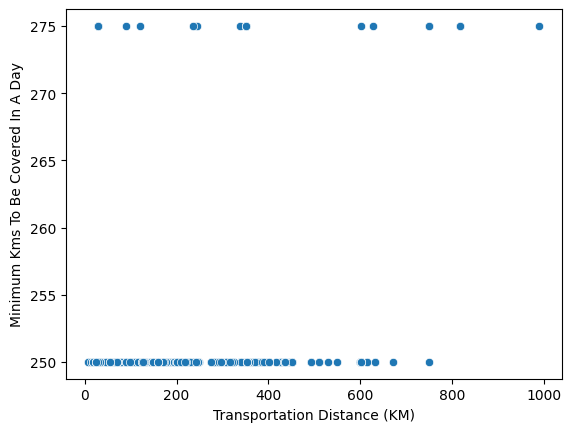

In [19]:
sns.scatterplot(x = df['Transportation Distance (KM)'],y = df['Minimum Kms To Be Covered In A Day'])

Can't find much correlation. Now let's see if there is any correlation between the above two based on origin and destination location.

#### Creating 4 new columns "Destination City", "Destination State", "Origin City" & "Origin State"

Done proper formatting like removed additional whitespace and converted to title case

In [20]:
# Extracting and formatting Destination City & State
df["Destination City"] = df["Destination Location"].apply(lambda x: x.split(",")[1].strip().title() if pd.notna(x) else None)
df["Destination State"] = df["Destination Location"].apply(lambda x: x.split(",")[2].strip().title() if pd.notna(x) and len(x.split(",")) > 2 else None)

# Extracting and formatting Origin City & State
df["Origin City"] = df["Origin Location"].apply(lambda x: x.split(",")[1].strip().title() if pd.notna(x) else None)
df["Origin State"] = df["Origin Location"].apply(lambda x: x.split(",")[2].strip().title() if pd.notna(x) and len(x.split(",")) > 2 else None)

In [21]:
df['Destination City'].unique() # all the unique values in "Destination City" column

array(['Kanchipuram', 'Krishnagiri', 'Alwar', 'Pune', 'Hosur', 'Chennai',
       'Pondy', 'Tiruvallur', 'Gurgaon', 'Ahmedabad', 'Jamshedpur',
       'Solan', 'Mysore', 'Kamrup', 'Rewari', 'Gautam Buddha Nagar',
       'Muzaffarnagar', 'Ghaziabad', 'Meerut', 'Saharanpur', 'Jaipur',
       'Jhajjar', 'Bilaspur (Hp)', 'Nalagarh', 'Vellore', 'Nadia',
       'Sundergarh', 'Bangalore', 'North Dinajpur', 'Satara', 'Guntur',
       'Chandauli', 'Ranchi', 'Faridabad', 'Medak', 'Ganganagar',
       'Hyderabad', 'Nagpur', 'Vadodara', 'Ludhiana', 'Unnao',
       'South Delhi', 'Lucknow', 'Bagmati', 'Rohtak', 'Kendujhar',
       'Surat', 'Betul', 'North Delhi', 'Allahabad', 'Mumbai', 'Krishna',
       'Bargarh', 'Coimbatore', 'Kokrajhar', 'Sonitpur', 'Kolkata',
       'Dibrugarh', 'Bankura', 'Boudh', 'Bulandshahr', 'Erode',
       'Namakkal', 'Amritsar', 'Bahraich', 'East Midnapore', 'West Delhi',
       'Mohali', 'Yamuna Nagar', 'Panchkula', 'Rajkot', 'Ahmednagar',
       'Churu', 'Rangareddy', 'B

In [22]:
df['Destination State'].unique() # all the unique values in "Destination State" column

array(['Tamil Nadu', 'Rajasthan', 'Maharashtra', 'Karnataka',
       'Pondicherry', 'Haryana', 'Gujarat', 'Jharkhand',
       'Himachal Pradesh', 'Assam', 'Uttar Pradesh', 'West Bengal',
       'Odisha', 'Andhra Pradesh', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Kerala', 'Dadra & Nagar Haveli'], dtype=object)

In [23]:
# checking Bagmati, Bagmati, Central Development Region belongs to which country
df[df['Destination State'] == "Central Development Region"]['Destination Location']

1287    Bagmati, Bagmati, Central Development Region
Name: Destination Location, dtype: object

#### Created one more column for the Destination country

As "Bagmati, Bagmati, Central Development Region" comes in Nepal

In [24]:
df["Destination Country"] = np.where(df["Destination State"] == "Central Development Region", "Nepal", "India")

In [25]:
# checking if these cities are real or there is discrepancy in the name
df[df['Destination City'].isin(['Boudh', 'Bilaspur (Hp)', 'Yamuna Nagar', 'Erode',
                                              'Panch Mahals', 'North 24 Parganas', 'Barpeta', 
                                              'Pakur', 'Pondicherry'])]

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location,Actual ETA,Current Location Latitude,Curren Location Longitude,Ontime,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Driver Mobile No,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country
466,Consent Track,AEIBK2025757,Regular,2020-08-12 13:39:47,MH14GD1032,"Shive, Pune, Maharashtra","Kandraur, Bilaspur (Hp), Himachal Pradesh",18.750621,73.877190,31.387859,76.762507,2020-08-23 06:50:07,2020-08-16 17:39:47,"Deradun Rd, Ramgarh, Haryana 134109, India",2020-08-23 10:48:29.930,30.648030,76.889480,No,2020-08-13 07:24:11,2020-08-22 16:00:00,1775.0,32 FT Single-Axle 7MT - HCV,NaN,PABU DAN NAYAK,6.377903e+09,Ericsson India Private Limited,New Chandigarh Haryana Roadway,Switch Assy (Final) -Hd10,Bilaspur (Hp),Himachal Pradesh,Pune,Maharashtra,India
1276,Consent Track,AEIBK2024601,Regular,2020-08-01 13:28:49,HR39D4877,"Shive, pune, maharashtra","Kandraur, Bilaspur (Hp), Himachal Pradesh",18.750621,73.877190,31.387859,76.762507,2020-08-07 09:15:12,2020-08-05 17:28:49,"13, Godown Area, Baltana, Sector 19, Zirakpur,...",2020-08-12 04:50:52.117,30.661941,76.812136,No,2020-08-01 13:28:49,2020-08-06 11:00:00,1775.0,32 FT Single-Axle 7MT - HCV,NaN,SHOKAT HUSSAIN,6.006450e+09,Ericsson India Private Limited,Rajdhani Roadways,Shaft,Bilaspur (Hp),Himachal Pradesh,Pune,Maharashtra,India
1473,Consent Track,AEIBK2024563,Regular,2020-08-01 10:50:53,OR21B1070,"Garudagaon, cuttack, odisha","Boudh Court, Boudh, Odisha",26.192290,91.751277,20.829132,84.206799,2020-08-05 00:10:09,2020-08-02 10:50:53,"Unnamed Road, Nelia, Odisha 754003, India",2020-08-07 16:14:12.500,20.582864,86.048634,No,2020-08-01 10:50:53,2020-08-07 10:32:00,250.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,250.0,TITU SWAIN,9.938377e+09,Larsen & Toubro Limited,Baba Lingaraj Enterprises Pvt Ltd,Ball Bearing,Boudh,Odisha,Cuttack,Odisha,India
1499,Consent Track,AEIBK2021336,Regular,2020-06-24 07:39:55,TN73B8236,"Anekal, bangalore, karnataka","Mulapalayam, Erode, Tamil Nadu",12.722686,77.676518,11.307704,77.739486,2020-08-06 17:45:24,2020-06-24 12:37:29,"Bannerghatta Anekal Rd, Jigani, Karnataka 5601...",2020-08-06 22:43:31.930,12.779777,77.633650,No,2020-06-24 07:39:55,2020-07-13 16:53:49,250.0,19 FT Open 7MT - MCV,NaN,SARAVANAN K M,8.754182e+09,Otis Elevator Company (India) Ltd,Unknown,Auto Parts,Erode,Tamil Nadu,Bangalore,Karnataka,India
1542,Consent Track,AEIBK2024439,Regular,2020-07-31 11:03:38,HR55AF4284,"Shive, pune, maharashtra","Kandraur, Bilaspur (Hp), Himachal Pradesh",18.750621,73.877190,31.387859,76.762507,2020-08-05 09:20:07,2020-08-04 15:03:38,"Kodhi Chowk Bus Stop, Mdr33, Tihri, Himachal P...",2020-08-06 07:44:17.500,31.357952,76.746240,No,2020-07-31 11:03:38,2020-08-05 11:00:00,1775.0,32 FT Single-Axle 7MT - HCV,NaN,SUKHVEER SINGH,6.397796e+09,Ericsson India Private Limited,North South Logistics Service,Auto Parts,Bilaspur (Hp),Himachal Pradesh,Pune,Maharashtra,India
1545,Consent Track,AEIBK2024441,Regular,2020-07-29 10:26:38,HR55AF0990,"Shive, pune, maharashtra","Kandraur, Bilaspur (Hp), Himachal Pradesh",18.750621,73.877190,31.387859,76.762507,2020-08-04 07:45:08,2020-08-02 14:26:38,"Near Bhagwati Cafe, Shimla - Kangra Road, Vpo ...",2020-08-06 07:52:34.897,31.343240,76.763650,No,2020-07-29 10:26:38,2020-08-05 11:00:00,1775.0,32 FT Single-Axle 7MT - HCV,NaN,UDHAM SINGH,7.248554e+09,Ericsson India Private Limited,North South Logistics Service,Cso Mounting Brkt - 1518rh,Bilaspur (Hp),Himachal Pradesh,Pune,Maharashtra,India
1619,Consent Track,AEIBK2019661,Regular,2020-06-01 14:35:12,UP17T8242,"Nistoli, ghaziabad, uttar pradesh","Model Town, Yamuna Nagar, Haryana",28.722966,77.

In [26]:
# replacing "Pondy" & "Pondicherry" with official name "Puducherry"
df["Destination City"] = df["Destination City"].replace({"Pondy": "Puducherry", "Pondicherry": "Puducherry"})

In [27]:
# replacing "Pondicherry" with official name "Puducherry"
df["Destination State"] = df["Destination State"].replace({ "Pondicherry": "Puducherry"})

In [28]:
df['Origin City'].unique() # all the unique values in "Origin City" column

array(['Pune', 'Kanchipuram', 'Ahmedabad', 'Coimbatore', 'Alwar',
       'Tiruvallur', 'Chennai', 'Mahesana', 'Pondy', 'Hosur', 'Gurgaon',
       'Bangalore', 'Krishnagiri', 'Madurai', 'Satara', 'Ghaziabad',
       'Jaipur', 'Rewari', 'Pondicherry', 'Vellore', 'Bardhaman',
       'Sundergarh', 'East Singhbhum', 'Bangalore Rural', 'Patna',
       'Bokaro', 'Kamrup', 'Anantapur', 'Cuttack', 'Thane',
       'North 24 Parganas', 'Howrah', 'Kolkata', 'Nashik', 'Chittoor',
       'Vadodara', 'Medak', 'Raipur', 'Kanpur Nagar', 'Hooghly',
       'Gandhinagar', 'Mysore', 'Raigarh', 'Darjiling', 'South Delhi',
       'Mumbai', 'Guntur', 'Faridabad', 'Ernakulam', 'Bankura', 'Durg',
       'Krishna'], dtype=object)

In [29]:
df['Origin State'].unique() # all the unique values in "Origin State" column

array(['Maharashtra', 'Tamil Nadu', 'Gujarat', 'Rajasthan', 'Pondicherry',
       'Haryana', 'Karnataka', 'Uttar Pradesh', 'West Bengal', 'Odisha',
       'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
       'Chattisgarh', 'Delhi', 'Kerala'], dtype=object)

In [30]:
# replacing "Pondicherry" with official name "Puducherry"
df['Origin State'] = df['Origin State'].replace({ "Pondicherry": "Puducherry"})

In [31]:
# replacing "Pondy" & "Pondicherry" with official name "Puducherry"
df["Origin City"] = df["Origin City"].replace({"Pondy": "Puducherry", "Pondicherry": "Puducherry"})

#### Checking if there is any correlation of location on 'Transportation Distance (KM)' & 'Minimum Kms To Be Covered In A Day' values

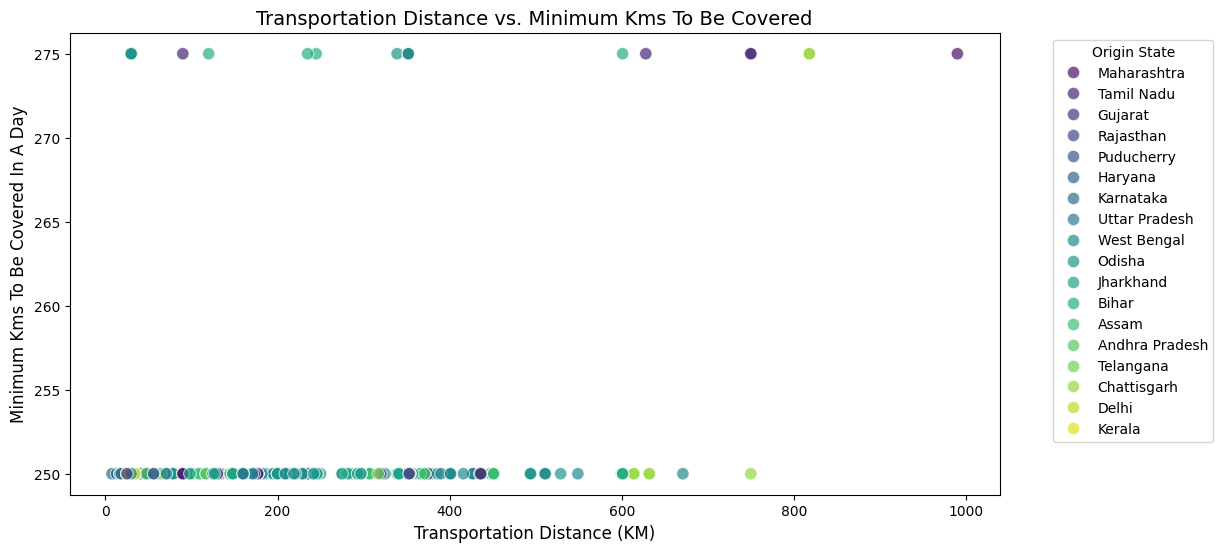

In [32]:
# Setting figure size
plt.figure(figsize=(12, 6))

# Creating scatter plot with better styling
sns.scatterplot(x=df['Transportation Distance (KM)'], 
                y=df['Minimum Kms To Be Covered In A Day'], 
                hue=df['Origin State'], 
                palette="viridis",   # Using a visually appealing color palette
                s=80, alpha=0.7)     # Adjusting marker size & transparency

# Adding titles and labels
plt.title("Transportation Distance vs. Minimum Kms To Be Covered", fontsize=14)
plt.xlabel("Transportation Distance (KM)", fontsize=12)
plt.ylabel("Minimum Kms To Be Covered In A Day", fontsize=12)

# Showing legend outside the plot for clarity
plt.legend(title="Origin State", bbox_to_anchor=(1.05, 1), loc='upper left')
 
# plot
plt.show()

C:\Users\shell\AppData\Local\Temp\ipykernel_2704\2338618664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Transportation Distance (KM)'])


<Axes: xlabel='Transportation Distance (KM)', ylabel='Density'>

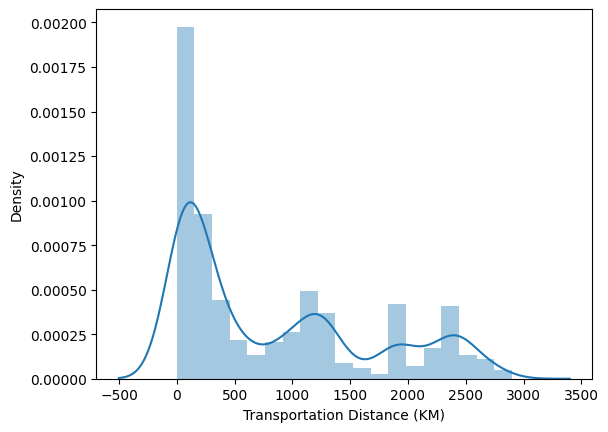

In [33]:
# 'Transportation Distance (KM)' distribution
sns.distplot(df['Transportation Distance (KM)'])

In [34]:
# 'Transportation Distance (KM)' statistical analysis
df['Transportation Distance (KM)'].describe()

count    3437.000000
mean      841.100320
std       851.889681
min         0.000000
25%       107.000000
50%       400.000000
75%      1290.000000
max      2898.000000
Name: Transportation Distance (KM), dtype: float64

(array([1462.,  368.,  121.,  247.,  463.,   52.,  232.,  141.,  285.,
          66.]),
 array([   0. ,  289.8,  579.6,  869.4, 1159.2, 1449. , 1738.8, 2028.6,
        2318.4, 2608.2, 2898. ]),
 <BarContainer object of 10 artists>)

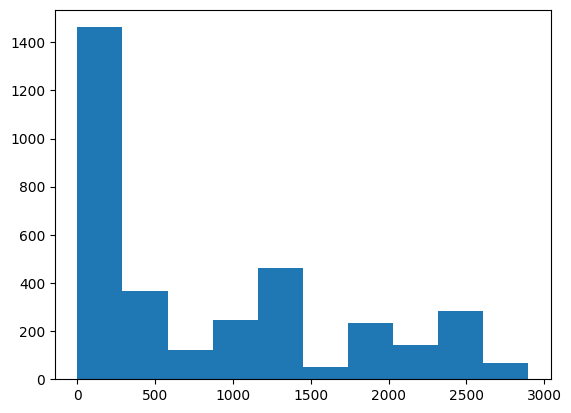

In [35]:
# histogram of 'Transportation Distance (KM)' values
plt.hist(df['Transportation Distance (KM)'])

In [36]:
# How many rows are there where 'Transportation Distance (KM)' is zero
print(f"Rows: {df[df['Transportation Distance (KM)'] == 0].shape[0]}")

Rows: 18


In [37]:
# Finding median values of 'Transportation Distance (KM)' with respect to 'Destination Location', 'Origin Location' column
df.groupby(['Origin Location', 'Destination Location'])['Transportation Distance (KM)'].median().reset_index()

,Origin Location,Destination Location,Transportation Distance (KM)
0,"Andul road, howrah, west bengal","Champadanga, Hooghly, West Bengal",43.60
1,"Andul road, howrah, west bengal","Gholkunda, Bankura, West Bengal",221.00
2,"Andul road, howrah, west bengal","Shitla, Bankura, West Bengal",221.00
3,"Andul road, howrah, west bengal","Tapta-Damdi, Bankura, West Bengal",200.00
4,"Anekal, Bangalore, Karnataka","Jamalpur, Gurgaon, Haryana",2230.00
5,"Anekal, Bangalore, Karnataka","Jamdar, Sundergarh, Odisha",1791.00
6,"Anekal, Bangalore, Karnataka","Ludhiana, Ludhiana, Punjab",2511.00
7,"Anekal, Bangalore, Karnataka","Sadhuwali, Ganganagar, Rajasthan",2483.00
8,"Anekal, Bangalore, Karnataka","Thumkunta, Hyderabad, Telangana",667.00
9,"Anekal, Bangalore, Karnataka","Vikarabad, Hyderabad, Telangana",617.00


In [38]:
# before filling with median values how many null values are there
df['Transportation Distance (KM)'].isnull().sum() 

np.int64(148)

In [39]:
# filling null values based on median caluclated based on 'Origin Location', 'Destination Location' column
df['Transportation Distance (KM)'] = df.groupby(['Origin Location', 'Destination Location'])['Transportation Distance (KM)'].transform(
    lambda x: x if x.notna().all() else x.fillna(x.dropna().median())
)

In [40]:
# After filling with median values how many null values are there
df['Transportation Distance (KM)'].isnull().sum()

np.int64(40)

In [41]:
# rows where Transportation Distance (KM)' value is zero
df[df['Transportation Distance (KM)'] == 0]

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location,Actual ETA,Current Location Latitude,Curren Location Longitude,Ontime,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Driver Mobile No,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country
1117,Vamosys,AEIBK2024564,Regular,2020-08-01 11:21:44,MH14GU4937,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-14 14:50:27,2020-08-01 11:21:44,"Wajewadi Chouphula, Chouphula, Maharashtra 412...",2020-08-14 15:30:46.650,18.716777,74.046197,No,2020-08-01 11:21:44,2020-08-14 07:39:00,0.0,1.5 MT Vehicle (Closed Body),NaN,VIKAS DABHADE,8.421821e+09,Comstar Automotive Technologies Pvt Ltd,Kiran Bajirao Shinde,Pinion,Pune,Maharashtra,Pune,Maharashtra,India
1206,Vamosys,AEIBK2025418,Regular,2020-08-10 11:54:17,MH14GU4937,"Shive, pune, maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-13 13:45:34,2020-08-10 11:54:17,"163/1/2, Shivatara Garden Society, Chaitanya N...",2020-08-13 15:00:46.097,18.501578,73.806572,No,2020-08-10 11:54:17,2020-08-13 13:21:00,0.0,1.5 MT Vehicle (Closed Body),NaN,KIRAN SHINDE,9.096448e+09,Comstar Automotive Technologies Pvt Ltd,Kiran Bajirao Shinde,Auto Parts,Pune,Maharashtra,Pune,Maharashtra,India
1207,Vamosys,AEIBK2024916,Regular,2020-08-05 17:53:18,MH14GU4937,"Shive, pune, maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-13 13:25:22,2020-08-05 17:53:18,"163/1/2, Shivatara Garden Society, Chaitanya N...",2020-08-13 14:45:50.233,18.501578,73.806572,No,2020-08-05 17:53:18,2020-08-13 13:15:00,0.0,1.5 MT Vehicle (Closed Body),NaN,VIKAS DABHADE,8.421821e+09,Comstar Automotive Technologies Pvt Ltd,Kiran Bajirao Shinde,Auto Parts,Pune,Maharashtra,Pune,Maharashtra,India
1208,Vamosys,AEIBK2025420,Regular,2020-08-10 12:12:14,MH14EM0172,"Shive, pune, maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-13 13:25:21,2020-08-10 12:12:14,"214, Moi Rd, Maharashtra 410501, India",2020-08-13 13:52:31.607,18.697296,73.839387,No,2020-08-10 12:12:14,2020-08-13 13:06:00,0.0,Mahindra LCV 1MT,NaN,VIKAS DABHADE,8.421821e+09,Comstar Automotive Technologies Pvt Ltd,Kiran Bajirao Shinde,Empty Trays,Pune,Maharashtra,Pune,Maharashtra,India
1214,Vamosys,AEIBK2025410,Regular,2020-08-10 11:25:30,MH12FZ3608,"Shive, pune, maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-13 12:45:30,2020-08-10 11:25:30,"Vijay Oil Mill, Nanekarwadi, Maharashtra 41050...",2020-08-13 12:55:52.860,18.741767,73.859065,No,2020-08-10 11:25:30,2020-08-13 12:23:00,0.0,17 FT Open 5MT - MCV,NaN,DAIWAN KADAM,9.272500e+09,Comstar Automotive Technologies Pvt Ltd,Daiwan Devidas Kadam,Empty Tray,Pune,Maharashtra,Pune,Maharashtra,India
1218,Vamosys,AEIBK2024803,Regular,2020-08-04 16:08:24,MH12FZ3608,"Shive, pune, maharashtra","Shive, Pune, Maharashtra",18.750621,73.877190,18.750621,73.877190,2020-08-13 12:15:36,2020-08-04 16:08:24,"Perfect Profiles, Dna Rd, Kurali, Maharashtra ...",2020-08-13 12:34:31.820,18.700710,73.845013,No,2020-08-04 16:08:24,2020-08-13 11:56:00,0.0,17 FT Open 5MT - MCV,NaN,DAIWAN KADAM,9.272500e+09,Comstar Automotive Technologies Pvt Ltd,Daiwan Devidas Kadam,Yoke,Pune,Maharashtra,Pune,Maharashtra,India
1481,Consent Track,AEIBK2024991,Regular,2020-08-06 10:43:59,KA528737,"Onnalvadi, krishnagiri, tamil nadu","Onnalvadi, Krishnagiri, Tamil Nadu",12.683589,77.859239,12.683589,77.859239,2020-08-05 09:05:19,2020-08-06 10:43:59,"Tvs Factory, Byathahalli, Karnataka 571311, India",2020-08-07 11:33:48.263,12.192882,76.642406,No,2020-08-06 10:43:59,2020-08-07 07:20:17,0.0,24 F

In [42]:
# now filling some more null values in 'Transportation Distance (KM)' column with median using columns 'Origin State' and 'Destination State'
df['Transportation Distance (KM)'] = df.groupby(['Origin State', 'Destination State'])['Transportation Distance (KM)'].transform(
    lambda x: x.fillna(x.mean() if not x.dropna().empty else np.nan)
)

In [43]:
# after filling with median how many null values are left
df['Transportation Distance (KM)'].isnull().sum()

np.int64(7)

In [44]:
# 'Transportation Distance (KM)' statistical analysis after filling most of the null values
df['Transportation Distance (KM)'].describe()

count    3578.000000
mean      861.175545
std       853.672805
min         0.000000
25%       110.000000
50%       515.500000
75%      1325.000000
max      2898.000000
Name: Transportation Distance (KM), dtype: float64

(array([1478.,  380.,  132.,  261.,  488.,   57.,  250.,  169.,  297.,
          66.]),
 array([   0. ,  289.8,  579.6,  869.4, 1159.2, 1449. , 1738.8, 2028.6,
        2318.4, 2608.2, 2898. ]),
 <BarContainer object of 10 artists>)

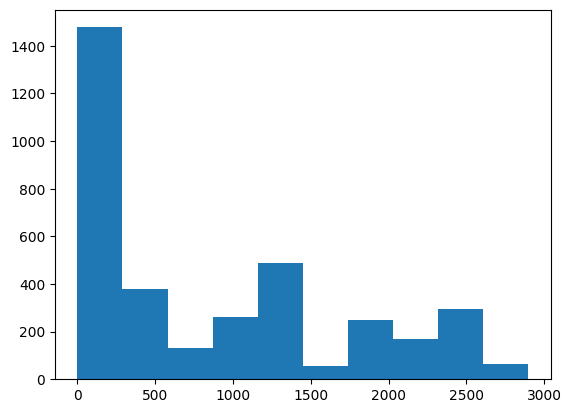

In [45]:
# histogram of 'Transportation Distance (KM)' values after filling most of the null values
plt.hist(df['Transportation Distance (KM)'])

In [46]:
# rfilling rest of the null values with the overall median of 'Transportation Distance (KM)' column
df['Transportation Distance (KM)'] = df['Transportation Distance (KM)'].fillna(df['Transportation Distance (KM)'].median())

filling null values in 'Minimum Kms To Be Covered In A Day' column based on below conditions:
1. if 'Transportation Distance (KM)' > 650 then 'Minimum Kms To Be Covered In A Day' = 275
2. if 0 < 'Transportation Distance (KM)' <= 650 then 'Minimum Kms To Be Covered In A Day' = 250
3. Else 'Minimum Kms To Be Covered In A Day' = 0

Why 275, 250 & 0 Values for 'Minimum Kms To Be Covered In A Day'
1. As available, 'Minimum Kms To Be Covered In A Day' values are either 275 or 250.
2. 'Minimum Kms To Be Covered In A Day' = 0 where 'Transportation Distance (KM)' is zero as considering not significant travel

In [47]:
df['Minimum Kms To Be Covered In A Day'] = df['Minimum Kms To Be Covered In A Day'].fillna(
    df['Transportation Distance (KM)'].apply(lambda x: 275 if x > 650 else (250 if 0 < x <= 650 else 0))
)

In [48]:
# Number of Null values in each column after filling Transportation Distance (KM) & Minimum Kms To Be Covered In A Day 
df.isnull().sum()

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                        12
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)             0
Vehicle Type                           764
Minimum Kms To Be Covered In A Day       0
Driver Name

#### Checking if we can fill Actual ETA with Data Ping Time

In [49]:
df1 = df[['Data Ping time', 'Actual ETA']].copy()  # Make a copy to avoid the warning

df1['Days Difference'] = (df1['Data Ping time'].dt.normalize() - df1['Actual ETA'].dt.normalize()).dt.days


In [50]:
df1[df1['Days Difference']>1]

,Data Ping time,Actual ETA,Days Difference
1529,2020-08-06 08:40:09,2020-07-31 22:00:00,6.0
1530,2020-08-05 00:10:09,2020-07-31 13:13:00,5.0
1531,2020-08-05 00:10:09,2020-07-31 13:13:00,5.0
1532,2020-08-04 22:20:22,2020-07-31 13:13:00,4.0
1533,2020-08-05 22:15:10,2020-07-31 18:13:00,5.0
1534,2020-08-05 00:10:09,2020-07-31 16:59:00,5.0
1535,2020-08-05 20:35:07,2020-07-31 19:12:00,5.0
1536,2020-08-05 00:10:09,2020-07-31 13:13:00,5.0
1537,2020-08-05 00:10:09,2020-07-31 13:13:00,5.0
1539,2020-08-06 09:50:12,2020-06-30 09:29:00,37.0


In [51]:
df1[df1['Days Difference']>1].shape[0]

69

Well, there are not many rows as compared to total rows where there is difference in Data Ping Date & Actual ETA Date so we can use it for filling Null values in Actual ETA & for the time part we can use most common hour based on Origin & Destination State

In [52]:
# Extractin Date from 'Data Ping time' column
df['ETA Date'] = df['Data Ping time'].dt.date

In [53]:
# Finding most common hour of Actual ETA for each (Origin State, Destination State) pair
common_hours = (
    df.dropna(subset=['Actual ETA'])
    .assign(ETA_Hour=lambda x: x['Actual ETA'].dt.hour)
    .groupby(['Origin State', 'Destination State'])['ETA_Hour']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)


In [54]:
# Merging common hours back into the main DataFrame
df = df.merge(common_hours, on=['Origin State', 'Destination State'], how='left')

In [55]:
# Filling missing 'Actual ETA'
df['Filled Actual ETA'] = df.apply(
    lambda row: pd.Timestamp(f"{row['ETA Date']} {row['ETA_Hour']:02d}:00:00") if pd.isna(row['Actual ETA']) else row['Actual ETA'],
    axis=1
)

In [56]:
#checking if the values are filled correctly or not by creating a separate dataframe
df_check = df[['Data Ping time','Actual ETA', 'Filled Actual ETA']]

In [57]:
# created new column in this dataframe to check where Actual ETA values are same to the Filled values
df_check.loc[:, 'Correct Transformation'] = np.where(df['Actual ETA'] == df['Filled Actual ETA'], 1, 0)

C:\Users\shell\AppData\Local\Temp\ipykernel_2704\2652916045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.loc[:, 'Correct Transformation'] = np.where(df['Actual ETA'] == df['Filled Actual ETA'], 1, 0)


In [58]:
df_check[df_check['Correct Transformation']==0]

,Data Ping time,Actual ETA,Filled Actual ETA,Correct Transformation
1320,2020-08-11 14:45:25,NaT,2020-08-11 13:00:00,0
1328,2020-08-11 14:00:30,NaT,2020-08-11 13:00:00,0
1372,2020-08-10 23:15:26,NaT,2020-08-10 14:00:00,0
1378,2020-08-10 17:45:19,NaT,2020-08-10 13:00:00,0
1381,2020-08-10 16:55:21,NaT,2020-08-10 17:00:00,0
1393,2020-08-10 12:40:20,NaT,2020-08-10 13:00:00,0
1398,2020-08-10 11:15:15,NaT,2020-08-10 13:00:00,0
1400,2020-08-10 10:30:14,NaT,2020-08-10 03:00:00,0
1401,2020-08-10 09:25:17,NaT,2020-08-10 14:00:00,0
1658,2020-08-04 09:00:22,NaT,2020-08-04 13:00:00,0


It is clear from above that only missing Actual ETA values are filled

In [59]:
df.isnull().sum()

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                        12
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)             0
Vehicle Type                           764
Minimum Kms To Be Covered In A Day       0
Driver Name

###### creating new column Actual ETA Date by extracting date from 'Actual ETA'
df['Actual ETA Date'] = df['Actual ETA'].dt.date

###### Filling null values in 'Actual ETA Date' with date from 'Data Ping time'
df['Actual ETA Date'].fillna(df['Data Ping time'].dt.date, inplace=True)

In [60]:
# Number of Null values in each column after above transformation
df.isnull().sum()

Gps Provider                             0
Booking ID                               0
Shipment Type                            0
Booking Date                             0
Vehicle Registration                     0
Origin Location                          0
Destination Location                     0
Origin Location Latitude                 0
Origin Location Longitude                0
Destination Location Latitude            0
Destination Location Longitude           0
Data Ping time                           1
Planned ETA                              0
Current Location                        12
Actual ETA                              25
Current Location Latitude                1
Curren Location Longitude                1
Ontime                                   0
Trip Start Date                          0
Trip End Date                            0
Transportation Distance (KM)             0
Vehicle Type                           764
Minimum Kms To Be Covered In A Day       0
Driver Name

In [61]:
# checking datatypes of the columns
df.dtypes

Gps Provider                                  object
Booking ID                                    object
Shipment Type                                 object
Booking Date                          datetime64[ns]
Vehicle Registration                          object
Origin Location                               object
Destination Location                          object
Origin Location Latitude                     float64
Origin Location Longitude                    float64
Destination Location Latitude                float64
Destination Location Longitude               float64
Data Ping time                        datetime64[ns]
Planned ETA                           datetime64[ns]
Current Location                              object
Actual ETA                            datetime64[ns]
Current Location Latitude                    float64
Curren Location Longitude                    float64
Ontime                                        object
Trip Start Date                       datetime

In [62]:
# filling null values in 'Vehicle Type' & 'Driver Name' with "Other"
df[['Vehicle Type', 'Driver Name']] = df[['Vehicle Type', 'Driver Name']].fillna('Other')

In [63]:
df['Ontime'].unique() # unique values in Ontime column

array(['Yes', 'No'], dtype=object)

In [64]:
# creating new columns called Delivery Status based on Ontime column
df['Delivery Status'] = np.where(df['Ontime'] == 'Yes', 'Ontime', 'Delay')

In [65]:
df['Delivery Status'].unique() # unique values in 'Delivery Status' Column

array(['Ontime', 'Delay'], dtype=object)

#### Filling null values in current location column

In [66]:
# first lets create a separate dataframe for better visualization of null rows
df_null_locations = df[df['Current Location'].isna()][['Current Location', 'Current Location Latitude', 'Curren Location Longitude']]

In [67]:
df_null_locations

,Current Location,Current Location Latitude,Curren Location Longitude
1320,NaN,18.699200,73.695900
1328,NaN,18.698302,73.840493
1372,NaN,12.785138,80.014267
1378,NaN,12.767053,80.005253
1381,NaN,12.836378,79.951233
1393,NaN,12.836737,79.950260
1398,NaN,18.743571,73.811982
1400,NaN,16.411264,74.372796
1401,NaN,23.491501,72.002509
1658,NaN,14.525328,75.770542


In [68]:
# importing other important libraries
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [69]:
# Initializing geolocator
geolocator = Nominatim(user_agent="geoapi", timeout=10)

In [70]:
# Function to get location from latitude and longitude
def get_location(lat, lon):
    try:
        if pd.notna(lat) and pd.notna(lon):  # Ensure lat & lon are not NaN
            location = geolocator.reverse((lat, lon), exactly_one=True)
            if location:
                address = location.raw.get('address', {})
                
                # Extract relevant parts (fallbacks in case some are missing)
                locality = address.get('village') or address.get('town') or address.get('city', '')
                district = address.get('county') or address.get('district', '')
                state = address.get('state', '')

                # Format: "Locality, District, State" (Remove empty parts)
                return ", ".join(filter(None, [locality, district, state]))
        return None
    except GeocoderTimedOut:
        return None

In [71]:
df['Filled Current Location'] = df.apply(
    lambda row: get_location(row['Current Location Latitude'], row['Curren Location Longitude']) 
    if pd.isna(row['Current Location']) else row['Current Location'], 
    axis=1
)

In [72]:
# checking if values are entered correctly or not
df[df['Current Location'] != df['Filled Current Location']][['Current Location', 'Filled Current Location']]

,Current Location,Filled Current Location
1320,NaN,"Somatane, Mawal, Maharashtra"
1328,NaN,"Khed, Maharashtra"
1372,NaN,"Maraimalai Nagar, Chengalpattu, Tamil Nadu"
1378,NaN,"Singaperumal Koil, Chengalpattu, Tamil Nadu"
1381,NaN,"Oragadam, Kanchipuram, Tamil Nadu"
1393,NaN,"Oragadam, Kanchipuram, Tamil Nadu"
1398,NaN,"Khed, Maharashtra"
1400,NaN,"Nippani, Nippani taluka, Karnataka"
1401,NaN,"Hansalpur Becharaji, Mandal Taluka, Gujarat"
1658,NaN,"Vaderayanahalli, Ranebennuru taluk, Karnataka"


#### Is there any error in Gps Provider Name

In [73]:
df['Gps Provider'].unique() # no of unique values in Gps Provider Name

array(['Consent Track', 'Vamosys', 'Virstempo', 'Nuevastech',
       'Krc Logistics', 'Forigotrans', 'Nimble', 'Ekta', 'Beecon',
       'Sailogistics', 'Bally Logistics', 'Apace_Transco', 'Wabcotrans',
       'Garuda', 'Prem Transport', 'Transcargo', 'Bhiwadidelhiroadline',
       'Prathikshatransport', 'Manual', 'Trans Cargo India',
       'Dhillongoods', 'Cargo Carriers', 'Vinayaka_Tvs',
       'Sri Vinayaka Transport', 'Jtech', 'Fleetx', 'Sahilcargo',
       'Instant', 'Null'], dtype=object)

In [74]:
# replacing "Null" with  "Other"
df['Gps Provider'] = df['Gps Provider'].replace({ "Null": "Other"})

In [75]:
df['Gps Provider'].unique()

array(['Consent Track', 'Vamosys', 'Virstempo', 'Nuevastech',
       'Krc Logistics', 'Forigotrans', 'Nimble', 'Ekta', 'Beecon',
       'Sailogistics', 'Bally Logistics', 'Apace_Transco', 'Wabcotrans',
       'Garuda', 'Prem Transport', 'Transcargo', 'Bhiwadidelhiroadline',
       'Prathikshatransport', 'Manual', 'Trans Cargo India',
       'Dhillongoods', 'Cargo Carriers', 'Vinayaka_Tvs',
       'Sri Vinayaka Transport', 'Jtech', 'Fleetx', 'Sahilcargo',
       'Instant', 'Other'], dtype=object)

In [76]:
df.tail(5) # last 5 rows of our data

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location,Actual ETA,Current Location Latitude,Curren Location Longitude,Ontime,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Driver Mobile No,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country,ETA Date,ETA_Hour,Filled Actual ETA,Delivery Status,Filled Current Location
3580,Consent Track,AEIBK1909187,Regular,2019-12-20 14:54:06,HR38S1605,"Okhla industrial estate, south delhi, delhi","Palam Airport, South West Delhi, Delhi",28.542809,77.280521,28.553908,77.090981,2019-12-16 10:45:15,2019-12-20 17:18:06,"Unnamed Road, Tekhand, Okhla Phase I, Okhla In...",2019-12-22 01:51:12.667,28.523281,77.287640,No,2019-12-20 14:54:06,2020-01-16 15:57:00,25.0,40 FT 3XL Trailer 35MT,250.0,Other,NaN,Larsen & Toubro Limited,S.B.Transport Company,Yoke & Pole Assembly,South West Delhi,Delhi,South Delhi,Delhi,India,2019-12-16,1,2019-12-22 01:51:12.667,Delay,"Unnamed Road, Tekhand, Okhla Phase I, Okhla In..."
3581,Consent Track,AEIBK1907026,Regular,2019-11-29 21:14:49,NL01G0589,"Kuldanga, howrah, west bengal","Kuldanga, Howrah, West Bengal",16.560192,80.792293,22.593221,88.472233,2019-12-12 09:05:13,2019-11-30 00:06:49,"45, Grand Trunk Rd, Naora, Shibpur, Howrah, We...",2019-12-18 15:52:54.543,25.136247,82.566526,No,2019-11-29 21:14:49,2020-02-05 16:57:55,30.0,40 FT Flat Bed Double-Axle 21MT - Trailer,250.0,Other,NaN,Larsen & Toubro Limited,Sunita Carriers Private Limited,Rectifier Assembly,Howrah,West Bengal,Howrah,West Bengal,India,2019-12-12,2,2019-12-18 15:52:54.543,Delay,"45, Grand Trunk Rd, Naora, Shibpur, Howrah, We..."
3582,Consent Track,AEIBK1906955,Regular,2019-11-30 15:10:27,GJ15UU7437,"Changodar, ahmedabad, gujarat","Zanu, Ahmedabad, Gujarat",16.560192,80.792293,23.042185,72.697893,2019-12-05 17:50:15,2019-11-30 17:34:27,"Unnamed Road, Gujarat 391243, India",2019-12-11 03:36:19.660,22.190830,73.078550,No,2019-11-30 15:10:27,2020-01-02 14:24:00,25.0,40 FT 3XL Trailer 35MT,250.0,MAHENDRA SINGH,8.949298e+09,Larsen & Toubro Limited,Balaji Freight Carrier,Grs Starter,Ahmedabad,Gujarat,Ahmedabad,Gujarat,India,2019-12-05,14,2019-12-11 03:36:19.660,Delay,"Unnamed Road, Gujarat 391243, India"
3583,Other,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, kolkata, west bengal","Kalyani, Nadia, West Bengal",23.525268,87.264424,22.952176,88.457141,NaT,1899-12-30 08:58:00,NaN,1899-12-30 08:13:00.000,NaN,NaN,Yes,1899-12-30 00:00:00,1899-12-30 08:13:00,51.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,250.0,Other,NaN,Larsen & Toubro Limited,Sunita Carriers Private Limited,Fxuwb-Lid Cover,Nadia,West Bengal,Kolkata,West Bengal,India,NaT,2,1899-12-30 08:13:00.000,Ontime,None
3584,Jtech,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, bangalore rural, karnataka","Peenya Small Industries, Bangalore, Karnataka",16.560192,80.792293,13.196313,77.708157,2019-06-14 15:20:12,1899-12-30 04:06:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...",1899-12-30 03:21:00.000,13.025077,77.723114,No,1899-12-30 00:00:00,1899-12-30 03:21:00,41.0,40 FT 3XL Trailer 35MT,250.0,Other,NaN,Larsen & Toubro Limited,A S Transports,Insrt-Vlv St Intk,Bangalore,Karnataka,Bangalore Rural,Karnataka,India,2019-06-14,15,1899-12-30 03:21:00.000,Delay,"Shed No 60, Medahalli Kadugodi Road, Virgonaga..."


As we can see from above that there are worng dates in "Planned ETA", "Actual ETA", "Trip Start Date" & "Trip End Date"

### Part-1

In [77]:
df2=df[(df['Origin City'] == 'Kolkata') & (df['Destination City'] == "Nadia")][['Booking Date','Data Ping time','Planned ETA','Filled Actual ETA','Trip Start Date','Trip End Date','Transportation Distance (KM)','Delivery Status','Origin City','Destination City']]

In [78]:
df2['Diff'] = pd.to_timedelta(df2['Filled Actual ETA'].dt.date-df2['Booking Date'].dt.date)

In [79]:
df2

,Booking Date,Data Ping time,Planned ETA,Filled Actual ETA,Trip Start Date,Trip End Date,Transportation Distance (KM),Delivery Status,Origin City,Destination City,Diff
2028,2020-05-29 18:18:58,2020-07-24 18:45:07,2020-05-29 23:11:58,2020-07-24 20:16:34.597,2020-05-29 18:18:58,2020-06-01 13:16:00,51.0,Delay,Kolkata,Nadia,56 days
3035,2020-01-16 19:30:37,2020-03-13 16:35:09,2020-01-17 00:23:37,2020-03-13 18:24:55.420,2020-01-16 19:30:37,2020-01-23 11:31:00,51.0,Delay,Kolkata,Nadia,57 days
3299,2020-01-16 20:24:56,2020-01-18 16:55:11,2020-01-17 16:22:56,2020-01-23 11:29:59.670,2020-01-16 20:24:56,2020-01-23 10:32:00,208.0,Delay,Kolkata,Nadia,7 days
3303,2020-01-20 16:12:27,2020-01-21 15:55:10,2020-01-20 21:05:27,2020-01-23 11:37:14.000,2020-01-20 16:12:27,2020-01-23 09:59:00,51.0,Delay,Kolkata,Nadia,3 days
3305,2020-01-20 16:12:28,2020-01-21 15:55:10,2020-01-20 21:05:28,2020-01-23 11:38:50.030,2020-01-20 16:12:28,2020-01-23 09:59:00,51.0,Delay,Kolkata,Nadia,3 days
3306,2020-01-20 16:12:27,2020-01-17 18:15:16,2020-01-20 21:05:27,2020-01-23 02:20:58.440,2020-01-20 16:12:27,2020-01-23 11:31:00,51.0,Delay,Kolkata,Nadia,3 days
3310,2020-01-16 15:57:02,2020-01-17 18:05:12,2020-01-16 20:50:02,2020-01-23 03:01:44.230,2020-01-16 15:57:02,2020-01-23 13:09:00,51.0,Delay,Kolkata,Nadia,7 days
3311,2020-01-16 21:55:59,2020-01-17 18:05:12,2020-01-17 02:48:59,2020-01-23 02:09:02.787,2020-01-16 21:55:59,2020-01-23 10:27:00,51.0,Delay,Kolkata,Nadia,7 days
3325,2020-01-20 16:12:28,2020-01-21 12:55:10,2020-01-20 21:05:28,2020-01-21 13:16:12.810,2020-01-20 16:12:28,2020-01-21 12:43:00,51.0,Delay,Kolkata,Nadia,1 days
3327,2020-01-10 22:16:29,2020-01-17 18:10:11,2020-01-11 03:09:29,2020-01-21 14:08:07.100,2020-01-10 22:16:29,2020-01-21 12:43:00,51.0,Delay,Kolkata,Nadia,11 days


In [80]:
df2['Diff_Days'] = df2['Diff'].dt.days

In [81]:
filtered_df = df2[(df2['Diff_Days'] > 0) & (df2['Transportation Distance (KM)'] == 51)]

In [82]:
filtered_df['Diff_Days'].describe()

count    22.000000
mean     11.727273
std      15.043372
min       1.000000
25%       4.250000
50%       8.000000
75%      10.000000
max      57.000000
Name: Diff_Days, dtype: float64

Data is rightly skewed hence selecting Median 8 Days to correct the date part in "Planned ETA", "Actual ETA", "Trip Start Date" & "Trip End Date" columns

In [83]:
# correcting values at index 3583
df.loc[3583, ['Planned ETA', 'Filled Actual ETA', 'Trip Start Date', 'Trip End Date']] = [
    pd.Timestamp("2019-06-18 08:58:00"),  
    pd.Timestamp("2019-06-18 08:13:00.000"),  
    pd.Timestamp("2019-06-18 00:00:00"),  
    pd.Timestamp("2019-06-18 08:13:00")  
]

In [84]:
df.loc[3583,:] # checking the result

Gps Provider                                                             Other
Booking ID                                                        WDSBKTP49392
Shipment Type                                                          Regular
Booking Date                                               2019-06-10 13:17:44
Vehicle Registration                                                 WB59B9152
Origin Location                                    Sonai, kolkata, west bengal
Destination Location                               Kalyani, Nadia, West Bengal
Origin Location Latitude                                             23.525268
Origin Location Longitude                                            87.264424
Destination Location Latitude                                        22.952176
Destination Location Longitude                                       88.457141
Data Ping time                                                             NaT
Planned ETA                                         

### Part-2

In [85]:
df3=df[(df['Origin City'] == 'Bangalore Rural') & (df['Destination City'] == "Bangalore")][['Booking Date','Data Ping time','Planned ETA','Filled Actual ETA','Trip Start Date','Trip End Date','Transportation Distance (KM)','Delivery Status','Origin City','Destination City']]

In [110]:
df3

,Booking Date,Data Ping time,Planned ETA,Filled Actual ETA,Trip Start Date,Trip End Date,Transportation Distance (KM),Delivery Status,Origin City,Destination City
886,2020-08-15 20:55:04,2020-08-17 00:05:10,2020-08-16 23:57:04,2020-08-18 11:39:55.560,2020-08-17 17:10:00,2020-08-18 11:21:00,31.7,Delay,Bangalore Rural,Bangalore
2680,2020-06-25 14:50:47,2020-06-27 22:30:06,2020-06-29 10:16:00,2020-06-29 08:16:00.000,2020-06-25 14:50:47,2020-06-29 08:16:00,31.7,Ontime,Bangalore Rural,Bangalore
2745,2020-06-19 16:14:20,2020-06-19 20:00:07,2020-06-22 15:29:00,2020-06-22 13:29:00.000,2020-06-19 16:14:20,2020-06-22 13:29:00,31.0,Ontime,Bangalore Rural,Bangalore
2780,2020-06-17 17:40:43,2020-06-18 06:55:07,2020-06-19 15:19:00,2020-06-19 13:19:00.000,2020-06-17 17:40:43,2020-06-19 13:19:00,31.0,Ontime,Bangalore Rural,Bangalore
2920,2020-01-14 16:16:02,2020-06-15 16:50:12,2020-01-14 20:06:02,2020-06-15 18:04:55.563,2020-01-14 16:16:02,2020-02-01 15:48:00,40.0,Delay,Bangalore Rural,Bangalore
2923,2020-06-11 12:26:32,2020-06-11 04:10:13,2020-06-15 17:51:00,2020-06-15 15:51:00.000,2020-06-11 12:26:32,2020-06-15 15:51:00,26.9,Ontime,Bangalore Rural,Bangalore
3108,2020-02-03 17:51:58,2020-02-04 15:29:11,2020-02-03 22:33:58,2020-02-04 16:52:33.277,2020-02-03 17:51:58,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore
3109,2020-02-03 17:48:15,2020-01-31 15:23:05,2020-02-03 22:30:15,2020-02-04 15:45:10.653,2020-02-03 17:48:15,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore
3136,2020-01-21 17:12:40,2020-01-31 15:23:05,2020-01-21 21:54:40,2020-02-03 15:56:34.080,2020-01-21 17:12:40,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore
3137,2020-01-21 17:10:19,2020-02-03 15:18:58,2020-01-21 21:52:19,2020-02-03 16:52:40.977,2020-01-21 17:10:19,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore


In [86]:
df3['Diff'] = pd.to_timedelta(df3['Filled Actual ETA'].dt.date-df3['Booking Date'].dt.date)

In [88]:
df3

,Booking Date,Data Ping time,Planned ETA,Filled Actual ETA,Trip Start Date,Trip End Date,Transportation Distance (KM),Delivery Status,Origin City,Destination City,Diff
886,2020-08-15 20:55:04,2020-08-17 00:05:10,2020-08-16 23:57:04,2020-08-18 11:39:55.560,2020-08-17 17:10:00,2020-08-18 11:21:00,31.7,Delay,Bangalore Rural,Bangalore,3 days
2680,2020-06-25 14:50:47,2020-06-27 22:30:06,2020-06-29 10:16:00,2020-06-29 08:16:00.000,2020-06-25 14:50:47,2020-06-29 08:16:00,31.7,Ontime,Bangalore Rural,Bangalore,4 days
2745,2020-06-19 16:14:20,2020-06-19 20:00:07,2020-06-22 15:29:00,2020-06-22 13:29:00.000,2020-06-19 16:14:20,2020-06-22 13:29:00,31.0,Ontime,Bangalore Rural,Bangalore,3 days
2780,2020-06-17 17:40:43,2020-06-18 06:55:07,2020-06-19 15:19:00,2020-06-19 13:19:00.000,2020-06-17 17:40:43,2020-06-19 13:19:00,31.0,Ontime,Bangalore Rural,Bangalore,2 days
2920,2020-01-14 16:16:02,2020-06-15 16:50:12,2020-01-14 20:06:02,2020-06-15 18:04:55.563,2020-01-14 16:16:02,2020-02-01 15:48:00,40.0,Delay,Bangalore Rural,Bangalore,153 days
2923,2020-06-11 12:26:32,2020-06-11 04:10:13,2020-06-15 17:51:00,2020-06-15 15:51:00.000,2020-06-11 12:26:32,2020-06-15 15:51:00,26.9,Ontime,Bangalore Rural,Bangalore,4 days
3108,2020-02-03 17:51:58,2020-02-04 15:29:11,2020-02-03 22:33:58,2020-02-04 16:52:33.277,2020-02-03 17:51:58,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore,1 days
3109,2020-02-03 17:48:15,2020-01-31 15:23:05,2020-02-03 22:30:15,2020-02-04 15:45:10.653,2020-02-03 17:48:15,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore,1 days
3136,2020-01-21 17:12:40,2020-01-31 15:23:05,2020-01-21 21:54:40,2020-02-03 15:56:34.080,2020-01-21 17:12:40,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore,13 days
3137,2020-01-21 17:10:19,2020-02-03 15:18:58,2020-01-21 21:52:19,2020-02-03 16:52:40.977,2020-01-21 17:10:19,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore,13 days


In [89]:
df3['Diff_Days'] = df3['Diff'].dt.days # extracting number part

In [91]:
# as the error row transport distance around 41 lets consider range of 40 to 49
filtered_df3 = df3[(df3['Diff_Days'] > 0) & 
                    (df3['Transportation Distance (KM)'] >= 40) & 
                    (df3['Transportation Distance (KM)'] <= 49)]

In [92]:
filtered_df3

,Booking Date,Data Ping time,Planned ETA,Filled Actual ETA,Trip Start Date,Trip End Date,Transportation Distance (KM),Delivery Status,Origin City,Destination City,Diff,Diff_Days
2920,2020-01-14 16:16:02,2020-06-15 16:50:12,2020-01-14 20:06:02,2020-06-15 18:04:55.563,2020-01-14 16:16:02,2020-02-01 15:48:00,40.0,Delay,Bangalore Rural,Bangalore,153 days,153
3108,2020-02-03 17:51:58,2020-02-04 15:29:11,2020-02-03 22:33:58,2020-02-04 16:52:33.277,2020-02-03 17:51:58,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore,1 days,1
3109,2020-02-03 17:48:15,2020-01-31 15:23:05,2020-02-03 22:30:15,2020-02-04 15:45:10.653,2020-02-03 17:48:15,2020-02-04 15:00:00,49.0,Delay,Bangalore Rural,Bangalore,1 days,1
3136,2020-01-21 17:12:40,2020-01-31 15:23:05,2020-01-21 21:54:40,2020-02-03 15:56:34.080,2020-01-21 17:12:40,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore,13 days,13
3137,2020-01-21 17:10:19,2020-02-03 15:18:58,2020-01-21 21:52:19,2020-02-03 16:52:40.977,2020-01-21 17:10:19,2020-02-03 15:08:00,49.0,Delay,Bangalore Rural,Bangalore,13 days,13
3318,2020-01-14 16:16:01,2020-01-22 12:40:09,2020-01-14 20:06:01,2020-01-22 23:07:55.837,2020-01-14 16:16:01,2020-01-22 12:28:00,40.0,Delay,Bangalore Rural,Bangalore,8 days,8
3335,2020-01-13 15:25:59,2020-01-15 18:35:20,2020-01-13 20:07:59,2020-01-21 01:31:53.187,2020-01-13 15:25:59,2020-01-31 16:04:00,49.0,Delay,Bangalore Rural,Bangalore,8 days,8
3336,2020-01-13 15:26:10,2020-01-15 18:25:13,2020-01-13 20:08:10,2020-01-21 01:23:03.367,2020-01-13 15:26:10,2020-01-22 12:28:00,49.0,Delay,Bangalore Rural,Bangalore,8 days,8
3413,2020-01-09 14:34:21,2020-01-10 14:10:17,2020-01-09 18:24:21,2020-01-10 14:20:19.073,2020-01-09 14:34:21,2020-01-10 14:10:17,40.0,Delay,Bangalore Rural,Bangalore,1 days,1
3415,2020-01-09 14:34:10,2020-01-10 09:10:08,2020-01-09 18:24:10,2020-01-10 09:20:16.030,2020-01-09 14:34:10,2020-01-10 09:10:08,40.0,Delay,Bangalore Rural,Bangalore,1 days,1


In [93]:
filtered_df3['Diff_Days'].describe() # statistical Analysis

count     23.000000
mean      11.521739
std       31.086199
min        1.000000
25%        1.000000
50%        6.000000
75%        8.000000
max      153.000000
Name: Diff_Days, dtype: float64

Again data is rightly skewed. hence using median days that is 6 days

In [94]:
# correcting values at index 3584
df.loc[3584, ['Planned ETA', 'Filled Actual ETA', 'Trip Start Date', 'Trip End Date']] = [
    pd.Timestamp("2019-04-21 04:06:00"),  
    pd.Timestamp("2019-04-22 03:21:00.000"),  
    pd.Timestamp("2019-04-21 00:00:00"),  
    pd.Timestamp("2019-04-22 03:21:00")  
]

In [95]:
df.loc[3584,:] # checking result

Gps Provider                                                                      Jtech
Booking ID                                                                 WDSBKTP44502
Shipment Type                                                                   Regular
Booking Date                                                        2019-04-15 15:15:13
Vehicle Registration                                                          KA21A5090
Origin Location                                    Mugabala, bangalore rural, karnataka
Destination Location                      Peenya Small Industries, Bangalore, Karnataka
Origin Location Latitude                                                      16.560192
Origin Location Longitude                                                     80.792293
Destination Location Latitude                                                 13.196313
Destination Location Longitude                                                77.708157
Data Ping time                  

### dropping unnecessary columns

In [96]:
columns_to_drop = ["Actual ETA", "Ontime","Driver Mobile No",'Current Location',"ETA Date","ETA_Hour"]

In [97]:
df.drop(columns = columns_to_drop, inplace = True)

In [98]:
df.head()

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location Latitude,Curren Location Longitude,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country,Filled Actual ETA,Delivery Status,Filled Current Location
0,Consent Track,AEIBK2027469,Regular,2020-08-26 12:03:46.000,MH14GD9464,"Shive, Pune, Maharashtra","Pondur, Kanchipuram, Tamil Nadu",18.750621,73.877190,12.930429,79.931163,2020-08-28 12:15:10,2020-08-30 16:03:46.000,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,1290.0,32 FT Multi-Axle 14MT - HCV,275.0,VIRAT NILAPALLE,Daimler India Commercial Vehicles Pvt Lt,Oms Logistics Pvt Ltd,Regulator - 12v,Kanchipuram,Tamil Nadu,Pune,Maharashtra,India,2020-08-28 12:48:07.380,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
1,Vamosys,VCV00014153/082021,Regular,2020-08-27 15:21:48.570,TN30BC9320,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:35:40,2020-08-31 19:21:48.570,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,29.0,Other,250.0,SENTHIL KUMAR,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 12:13:51.543,Ontime,"Gokulapuram Main Rd, Maraimalai Nagar, Tamil N..."
2,Vamosys,VCV00014063/082021,Regular,2020-08-27 14:22:17.833,TN30BB1036,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:38,2020-08-31 18:22:17.833,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,21.0,Other,250.0,ANBU,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:33:19.043,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
3,Vamosys,VCV00014741/082021,Regular,2020-08-28 00:32:20.523,TN88D4134,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:37,2020-09-01 04:32:20.523,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,20.0,Other,250.0,SUDHAKAR,Daimler India Commercial Vehicles Pvt Lt,Namakkal Sri Anjinaya Transport,Lu Hood Lock / Rh,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:31:29.780,Ontime,"Unnamed Road, Oragadam Industrial Corridor, Or..."
4,Consent Track,AEIBK2027446,Regular,2020-08-26 09:55:08.000,GJ01DZ8943,"Khorajnanoda, Ahmedabad, Gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu",22.961777,72.094219,12.786517,79.975221,2020-08-28 08:35:08,2020-08-30 13:55:08.000,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,1900.0,32 FT Single-Axle 7MT - HCV,275.0,MAN SINGH,Ford India Private Limited,Sterling Translogistics Private Limited,Lu Latch / Pin,Kanchipuram,Tamil Nadu,Ahmedabad,Gujarat,India,2020-08-29 07:09:41.173,Ontime,"Rajmata Jijau Marg, Suhash Colony, Beed, Mahar..."


In [99]:
# renaming columns 
rename_dict = {
    "Filled Current Location": "Current Location",
    "Filled Actual ETA": "Actual ETA",
    "Curren Location Longitude": "Current Location Longitude"
}

In [100]:
df = df.rename(columns=rename_dict)

In [101]:
# removing additional whitespaces and converting in title case
columns_to_clean = ["Gps Provider", "Shipment Type",  "Origin Location", "Destination Location", "Current Location","Driver Name"]

In [102]:
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.strip().str.title())

In [103]:
df.head()

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location Latitude,Current Location Longitude,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country,Actual ETA,Delivery Status,Current Location
0,Consent Track,AEIBK2027469,Regular,2020-08-26 12:03:46.000,MH14GD9464,"Shive, Pune, Maharashtra","Pondur, Kanchipuram, Tamil Nadu",18.750621,73.877190,12.930429,79.931163,2020-08-28 12:15:10,2020-08-30 16:03:46.000,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,1290.0,32 FT Multi-Axle 14MT - HCV,275.0,Virat Nilapalle,Daimler India Commercial Vehicles Pvt Lt,Oms Logistics Pvt Ltd,Regulator - 12v,Kanchipuram,Tamil Nadu,Pune,Maharashtra,India,2020-08-28 12:48:07.380,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
1,Vamosys,VCV00014153/082021,Regular,2020-08-27 15:21:48.570,TN30BC9320,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:35:40,2020-08-31 19:21:48.570,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,29.0,Other,250.0,Senthil Kumar,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 12:13:51.543,Ontime,"Gokulapuram Main Rd, Maraimalai Nagar, Tamil N..."
2,Vamosys,VCV00014063/082021,Regular,2020-08-27 14:22:17.833,TN30BB1036,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:38,2020-08-31 18:22:17.833,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,21.0,Other,250.0,Anbu,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:33:19.043,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
3,Vamosys,VCV00014741/082021,Regular,2020-08-28 00:32:20.523,TN88D4134,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:37,2020-09-01 04:32:20.523,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,20.0,Other,250.0,Sudhakar,Daimler India Commercial Vehicles Pvt Lt,Namakkal Sri Anjinaya Transport,Lu Hood Lock / Rh,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:31:29.780,Ontime,"Unnamed Road, Oragadam Industrial Corridor, Or..."
4,Consent Track,AEIBK2027446,Regular,2020-08-26 09:55:08.000,GJ01DZ8943,"Khorajnanoda, Ahmedabad, Gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu",22.961777,72.094219,12.786517,79.975221,2020-08-28 08:35:08,2020-08-30 13:55:08.000,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,1900.0,32 FT Single-Axle 7MT - HCV,275.0,Man Singh,Ford India Private Limited,Sterling Translogistics Private Limited,Lu Latch / Pin,Kanchipuram,Tamil Nadu,Ahmedabad,Gujarat,India,2020-08-29 07:09:41.173,Ontime,"Rajmata Jijau Marg, Suhash Colony, Beed, Mahar..."


In [104]:
# columns from where only whitespaces to remove
columns_to_clean = ["Booking ID",  "Customer Name", "Supplier Name","Material Shipped"]

In [105]:
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.strip())

In [106]:
df.head()

,Gps Provider,Booking ID,Shipment Type,Booking Date,Vehicle Registration,Origin Location,Destination Location,Origin Location Latitude,Origin Location Longitude,Destination Location Latitude,Destination Location Longitude,Data Ping time,Planned ETA,Current Location Latitude,Current Location Longitude,Trip Start Date,Trip End Date,Transportation Distance (KM),Vehicle Type,Minimum Kms To Be Covered In A Day,Driver Name,Customer Name,Supplier Name,Material Shipped,Destination City,Destination State,Origin City,Origin State,Destination Country,Actual ETA,Delivery Status,Current Location
0,Consent Track,AEIBK2027469,Regular,2020-08-26 12:03:46.000,MH14GD9464,"Shive, Pune, Maharashtra","Pondur, Kanchipuram, Tamil Nadu",18.750621,73.877190,12.930429,79.931163,2020-08-28 12:15:10,2020-08-30 16:03:46.000,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,1290.0,32 FT Multi-Axle 14MT - HCV,275.0,Virat Nilapalle,Daimler India Commercial Vehicles Pvt Lt,Oms Logistics Pvt Ltd,Regulator - 12v,Kanchipuram,Tamil Nadu,Pune,Maharashtra,India,2020-08-28 12:48:07.380,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
1,Vamosys,VCV00014153/082021,Regular,2020-08-27 15:21:48.570,TN30BC9320,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:35:40,2020-08-31 19:21:48.570,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,29.0,Other,250.0,Senthil Kumar,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 12:13:51.543,Ontime,"Gokulapuram Main Rd, Maraimalai Nagar, Tamil N..."
2,Vamosys,VCV00014063/082021,Regular,2020-08-27 14:22:17.833,TN30BB1036,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:38,2020-08-31 18:22:17.833,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,21.0,Other,250.0,Anbu,Daimler India Commercial Vehicles Pvt Lt,Vj Logistics,Valve Spring,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:33:19.043,Ontime,"Singaperumal Koil - Sriperumbudur Rd, Oragadam..."
3,Vamosys,VCV00014741/082021,Regular,2020-08-28 00:32:20.523,TN88D4134,"Daimler India Commercial Vehicles,Kanchipuram,...","Daimler India Commercial Vehicles,Kanchipuram,...",12.839000,79.954000,12.839000,79.954000,2020-08-28 11:25:37,2020-09-01 04:32:20.523,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,20.0,Other,250.0,Sudhakar,Daimler India Commercial Vehicles Pvt Lt,Namakkal Sri Anjinaya Transport,Lu Hood Lock / Rh,Kanchipuram,Tamil Nadu,Kanchipuram,Tamil Nadu,India,2020-08-28 11:31:29.780,Ontime,"Unnamed Road, Oragadam Industrial Corridor, Or..."
4,Consent Track,AEIBK2027446,Regular,2020-08-26 09:55:08.000,GJ01DZ8943,"Khorajnanoda, Ahmedabad, Gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu",22.961777,72.094219,12.786517,79.975221,2020-08-28 08:35:08,2020-08-30 13:55:08.000,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,1900.0,32 FT Single-Axle 7MT - HCV,275.0,Man Singh,Ford India Private Limited,Sterling Translogistics Private Limited,Lu Latch / Pin,Kanchipuram,Tamil Nadu,Ahmedabad,Gujarat,India,2020-08-29 07:09:41.173,Ontime,"Rajmata Jijau Marg, Suhash Colony, Beed, Mahar..."


In [107]:
df.isnull().sum()

Gps Provider                          0
Booking ID                            0
Shipment Type                         0
Booking Date                          0
Vehicle Registration                  0
Origin Location                       0
Destination Location                  0
Origin Location Latitude              0
Origin Location Longitude             0
Destination Location Latitude         0
Destination Location Longitude        0
Data Ping time                        1
Planned ETA                           0
Current Location Latitude             1
Current Location Longitude            1
Trip Start Date                       0
Trip End Date                         0
Transportation Distance (KM)          0
Vehicle Type                          0
Minimum Kms To Be Covered In A Day    0
Driver Name                           0
Customer Name                         0
Supplier Name                         0
Material Shipped                      0
Destination City                      0


### entering this clean into the existing data sheet

In [108]:
file_path = r"F:\Data Analysis Project Challenge\Zoom Charts Challenge\FP20 Analytics Challenges\Dataset_FP20Analytics_Feb_2025\Dataset\Transportation & Logistics Tracking Dataset.xlsx"

In [109]:
# Reading existing data
with pd.ExcelWriter(file_path, mode="a", if_sheet_exists="replace", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Cleaned_Data2", index=False)  # Entering this date to Cleaned_Data Sheet

In [110]:
print("Data successfully written to the existing Excel file!")

Data successfully written to the existing Excel file!
